# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [47]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [48]:
sample_size=df.temperature.size
sample_size

130

In [49]:
mean=df.temperature.mean()
mean

98.24923076923078

In [50]:
std=df.temperature.std()
std

0.7331831580389454

In [51]:
median=df.temperature.median()
median

98.3

##  Q1. Is the distribution of body temperatures normal? (YES!)
 Histogram & Q-Q Plot shows body temperature distribution is NORMAL

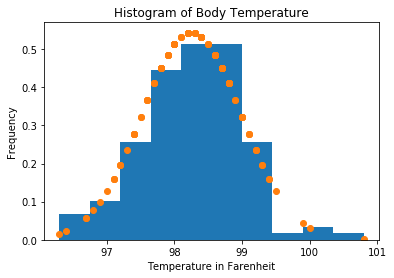

In [52]:
##
import scipy.stats as stats
 
plt.hist(df.temperature, normed=True)
normfit=stats.norm.pdf(df.temperature, mean, std)
plt.plot(df.temperature, normfit, 'o')
plt.xlabel('Temperature in Farenheit')
plt.ylabel('Frequency')
plt.title('Histogram of Body Temperature')
plt.show()


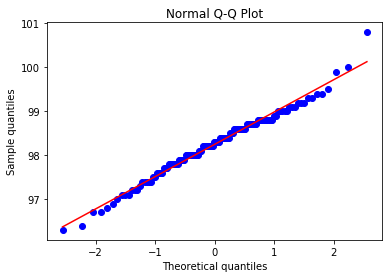

In [53]:
## QQ plot
import pylab 

 
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.title("Normal Q-Q Plot")
pylab.ylabel("Sample quantiles")
pylab.show()

## Q2. Is the sample size large? Are the observations independent? 
Sample size > 30 and sufficiently large for CLT.  Samples are independent because they are taken from different people.


## Q3. Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the t or z statistic? 
Now try using the other test. How is the result be different? Why? 

### Ho: True Population Mean is 98.6 F
### H1: True Population Mean is not 98.6 F

One sample test is appropriatet to use since a set of temperatures will be tested against the population mean of 98.6 F.  T-statistic is appropriate to use in this case since t values needed to be compared to critical t values to test the Ho. If calculated t_value>critical_t  then Ho can be rejected

In [54]:
## Calculate t- value  (t-value= signal/noise)
signal=mean-98.6
noise=std/(sample_size**0.5)
t_value=signal/noise
t_value



-5.454823292364079

In [55]:
#Calculate critical t-value
# n=130, p<0.05, 2-tail
critical_t=stats.t.ppf(1-0.025, 129)
critical_t

1.9785244914586051

In [78]:
std*critical_t

1.4506208349050185

In [56]:
true_mean1=mean+ std*critical_t
true_mean1

99.699851604135802

In [57]:
true_mean2=mean-std*critical_t
true_mean2


96.798609934325754

In [58]:
if t_value>critical_t:
    print('Ho must be rejected. True Population Mean is NOT 98.6 F')
else:
    print('Ho is True.  True Population mean is 98.6 F.')
    print('Using t-statistic there is 95% Confidence that True population mean is 1.98 standard deviation away from 98.25 F')
    print('Using t-statistic there is 95% Confidence that True population mean is between ', round(true_mean2,2),'F and ', round(true_mean1,2), 'F.')
    

Ho is True.  True Population mean is 98.6 F.
Using t-statistic there is 95% Confidence that True population mean is 1.98 standard deviation away from 98.25 F
Using t-statistic there is 95% Confidence that True population mean is between  96.8 F and  99.7 F.


98.6 F is within this range. There is 95% confidence that it is True population mean 98.6 F is within this range. 

### Using Z-statistic in Q3 

In [59]:
#95% Confidence is 1.96 std from the mean
true_mean1_z= mean+ std*1.96
true_mean1_z


99.68626975898711

In [60]:
true_mean2_z=mean-std*1.96
true_mean2_z

96.81219177947445

In [79]:
std*1.96

1.437038989756333

In [61]:
print('Using z-statistic there is 95% Confidence that True population mean is 1.65 standard deviation away from 98.25 F')
print('Using z-statistic there is 95% Confidence that True population mean is between ', round(true_mean2_z,2), ' F and ', round(true_mean1_z,2), 'F.')

Using z-statistic there is 95% Confidence that True population mean is 1.65 standard deviation away from 98.25 F
Using z-statistic there is 95% Confidence that True population mean is between  96.81  F and  99.69 F.


98.6 F is within this range. There is 95% confidence that it is True population mean

Difference between t statistic and z statistic   
Results of t-statistic and z statistic is very similar in this case!


## Q4. At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 

In [62]:
print('Using z-statistic there is 95% Confidence that Normal temperatures are 1.65 standard deviation away from population mean')
print('Using z-statistic there is 95% Confidence that Abnormal temperatures are not between ', round(true_mean2_z,2), ' F and ', round(true_mean1_z,2), 'F.')


Using z-statistic there is 95% Confidence that Normal temperatures are 1.65 standard deviation away from population mean
Using z-statistic there is 95% Confidence that Abnormal temperatures are not between  96.81  F and  99.69 F.


## Q5. Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem. 

Ho: female mean tempearture is equal to male mean temperature
H1: female mean temperature is not equal to male mean temperature

In [63]:
##Male Temperatures
men=df[df.gender=='M']
men.shape

(65, 3)

In [64]:
men.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [65]:
men_mean_temp=men.temperature.mean()
men_mean_temp

98.1046153846154

In [66]:
men_std_temp=men.temperature.std()
men_std_temp

0.6987557623265908

In [67]:
##Female Temperatures
fem=df[df.gender=='F']
fem.shape

(65, 3)

In [68]:
fem.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
3,99.2,F,66.0
4,98.0,F,73.0
8,98.4,F,84.0


In [69]:
fem_mean_temp=fem.temperature.mean()
fem_mean_temp

98.39384615384613

In [70]:
fem_std_temp=fem.temperature.std()
fem_std_temp

0.7434877527313665

In [71]:
## Diference in mean of Male and Female temperatures
mean_diff=fem_mean_temp - men_mean_temp
mean_diff

0.289230769230727

In [72]:
## Standard Error Calculation
SE=((men_std_temp**2)/65 + (fem_std_temp**2)/65)**0.5
SE

0.12655395041982642

In [73]:
## Degrees of Freedom Calculation
F1=fem_std_temp**2/65
M1=men_std_temp**2/65

DF=((F1+M1)**2)/(((F1**2)/64)+((M1**2)/64))
DF

127.5103008303909

In [74]:
## Use 0.05 Significance level in two sample t-test
t_val=((fem_mean_temp-men_mean_temp)-0)/SE
t_val



2.285434538165274

In [76]:
p_value = stats.t.sf(np.abs(2.29), 128)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

0.023657711289024146

In [77]:
if p_value<0.05:
    print('Ho that mean of female and male temperature are the same will be rejected')
    print('There is significance difference between male and female body temperatures')

Ho that mean of female and male temperature are the same will be rejected
There is significance difference between male and female body temperatures
